1. MNIST dataset으로 분류기를 만들어 test data에서 97% 정확도 이상을 내보아라. \
Hint : KNeigbborsClassifier, weights와 n_neighbors 하이퍼파라미터를 이용한 그리드 탐색 시도.

In [1]:
from keras.datasets import mnist
import ssl
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

2023-01-03 03:27:32.877535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ssl._create_default_https_context = ssl._create_unverified_context

(train_X, train_y), (test_X, test_y) = mnist.load_data()

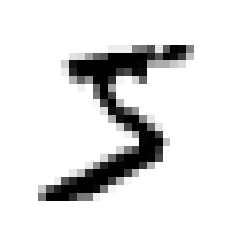

5


In [22]:
tmp_digit = train_X[0]
tmp_digit_image = tmp_digit.reshape(28,28)

plt.imshow(tmp_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print(train_y[0])

In [4]:
train_y = train_y.astype(np.uint8)
test_y = test_y.astype(np.uint8)

train_X=train_X.reshape(60000,784)
test_X=test_X.reshape(10000, 784)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_sc = scaler.fit_transform(train_X.astype(np.float64))

test_X_sc = scaler.fit_transform(test_X.astype(np.float64))


In [25]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [88]:
import sklearn
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'haversine',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'nan_euclidean',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule']

In [9]:
knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
knn_clf.fit(train_X, train_y)


y_hat = knn_clf.predict(test_X)
accuracy_score(test_y, y_hat)
# 0.97

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

In [13]:
knn_clf_sc = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='euclidean')
knn_clf_sc.fit(train_X_sc, train_y)

y_hat = knn_clf.predict(test_X_sc)
accuracy_score(test_y, y_hat)

0.1135